In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath("..")) #adds src to python path


def compute_network_stats(G, network_name="test"):
    if type(G) == str:
        #if its given a gml file path
        G = nx.read_gml(G)
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_subgraph = G.subgraph(largest_cc)
    stats = {
        "Network": network_name,
        "|N|": G.number_of_nodes(),
        "|V|": G.number_of_edges(),
        "Density": nx.density(G),
        "<k>": np.mean(list(dict(G.degree()).values())),
        "<k> weighted": np.mean(list(dict(G.degree(weight='weight')).values())),
        "<cc>": nx.average_clustering(G),
        "<spath>": nx.average_shortest_path_length(largest_cc_subgraph),
        "d": nx.diameter(largest_cc_subgraph)
    }
    
    return stats

#### 1.1


* gene-gene presence
* nodes include the genes that are present in more than p% of the total genomes
* 4 arguments

```bash 
for i in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
do
    python src/create_gene_network.py test/roary/gene_presence_absence.csv 13 $i data/graphs/1.1_gene-gene_presence_${i}_strepto_31.gml
done
```

In [31]:
G1=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.1_strepto_31.gml")
G2=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.2_strepto_31.gml")
G3=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.3_strepto_31.gml")
G4=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.4_strepto_31.gml")
G5=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.5_strepto_31.gml")
G6=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.6_strepto_31.gml")
G7=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.7_strepto_31.gml")
G8=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.8_strepto_31.gml")
G9=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_0.9_strepto_31.gml")
G10=nx.read_gml("../../data/graphs/1.1_gene-gene_presence_1_strepto_31.gml")


KeyboardInterrupt: 

In [13]:
stat1=compute_network_stats(G1, "31 strepto t=0.1")
stat2=compute_network_stats(G2, "31 strepto t=0.2")
stat3=compute_network_stats(G3, "31 strepto t=0.3")
stat4=compute_network_stats(G4, "31 strepto t=0.4")
stat5=compute_network_stats(G5, "31 strepto t=0.5")
stat6=compute_network_stats(G6, "31 strepto t=0.6")
stat7=compute_network_stats(G7, "31 strepto t=0.7")
stat8=compute_network_stats(G8, "31 strepto t=0.8")
stat9=compute_network_stats(G9, "31 strepto t=0.9")
# stat10=compute_network_stats(G10, "31 strepto t=1.0")

ValueError: max() iterable argument is empty

In [19]:
stats = pd.DataFrame([stat1, stat2, stat3, stat4, stat5, stat6, stat7, stat8, stat9])
#change col |V| to |E|
stats.rename(columns={"|V|": "|E|"}, inplace=True)
stats

,Network,|N|,|E|,Density,<k>,<k> weighted,<cc>,<spath>,d
0,31 strepto t=0.1,2728,3073107,0.826187,2253.010997,23374.733138,0.918437,1.173813,2
1,31 strepto t=0.2,1796,1602299,0.994038,1784.297327,29330.652561,0.994884,1.005962,2
2,31 strepto t=0.3,1584,1253671,0.999948,1582.917929,30469.280303,0.999948,1.000052,2
3,31 strepto t=0.4,1463,1069448,0.999995,1461.993165,30604.213260,0.999995,1.000005,2
4,31 strepto t=0.5,1354,915981,1.000000,1353.000000,30148.437223,1.000000,1.000000,1
5,31 strepto t=0.6,1240,768180,1.000000,1239.000000,29045.537097,1.000000,1.000000,1
6,31 strepto t=0.7,1047,547581,1.000000,1046.000000,26133.449857,1.000000,1.000000,1
7,31 strepto t=0.8,688,236328,1.000000,687.000000,18747.223837,1.000000,1.000000,1
8,31 strepto t=0.9,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1


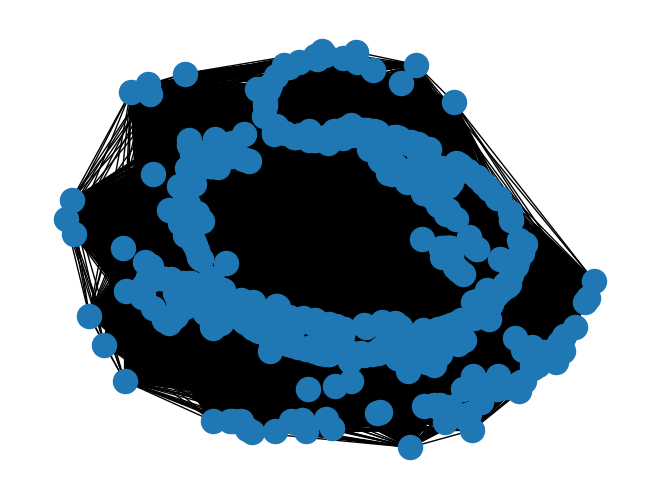

In [18]:
#visualizeing network 9
nx.draw(G9, with_labels=False)

#### 1.2

* gene-gene presence
* nodes include the genes that are present in more than 90% of the total genomes
* edges include the edges only when 2 genes coexist in >= p% of the genomes
* 5 arguments

```bash 
for i in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
do
    python src/create_gene_network.py test/roary/gene_presence_absence.csv 13 0.9 $i data/graphs/1.1_gene-gene_presence_${i}_strepto_31.gml
done
```

In [41]:
g1 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.1edge_strepto_31.gml")
g2 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.2edge_strepto_31.gml")
g3 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.3edge_strepto_31.gml")
g4 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.4edge_strepto_31.gml")
g5 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.5edge_strepto_31.gml")
g6 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.6edge_strepto_31.gml")
g7 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.7edge_strepto_31.gml")
g8 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.8edge_strepto_31.gml")
g9 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_0.9edge_strepto_31.gml")
g10 = nx.read_gml("../../data/graphs/1.2_gene-gene_presence_0.5node_1edge_strepto_31.gml")

In [42]:
stats1=compute_network_stats(g1, "nodes 0.5 edges t=0.1")
stats2=compute_network_stats(g2, "nodes 0.5 edges t=0.2")
stats3=compute_network_stats(g3, "nodes 0.5 edges t=0.3")
stats4=compute_network_stats(g4, "nodes 0.5 edges t=0.4")
stats5=compute_network_stats(g5, "nodes 0.5 edges t=0.5")
stats6=compute_network_stats(g6, "nodes 0.5 edges t=0.6")
stats7=compute_network_stats(g7, "nodes 0.5 edges t=0.7")
stats8=compute_network_stats(g8, "nodes 0.5 edges t=0.8")
stats9=compute_network_stats(g9, "nodes 0.5 edges t=0.9")
stats10=compute_network_stats(g10, "nodes 0.5 edges t=1.0")

In [44]:
stats=pd.DataFrame([stats1, stats2, stats3, stats4, stats5, stats6, stats7, stats8, stats9, stats10])
#make the V to E
stats.rename(columns={"|V|": "|E|"}, inplace=True)
stats

,Network,|N|,|E|,Density,<k>,<k> weighted,<cc>,<spath>,d
0,nodes 0.5 edges t=0.1,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
1,nodes 0.5 edges t=0.2,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
2,nodes 0.5 edges t=0.3,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
3,nodes 0.5 edges t=0.4,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
4,nodes 0.5 edges t=0.5,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
5,nodes 0.5 edges t=0.6,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
6,nodes 0.5 edges t=0.7,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
7,nodes 0.5 edges t=0.8,577,166176,1.000000,576.000000,16141.247834,1.000000,1.000000,1
8,nodes 0.5 edges t=0.9,577,158454,0.953531,549.233969,15427.764298,0.990915,1.046469,2
9,nodes 0.5 edges t=1.0,30,435,1.000000,29.000000,899.000000,1.000000,1.000000,1
